[Motion Clouds](https://neuralensemble.github.io/MotionClouds) were defined in the origin to define parameterized moving textures. The library in itself is also interesting in itself to generate a spatial texture. Herein I describe a solution to generate just one static frame.

<!-- TEASER_END -->

There are multiple solutions, and the simplest is perhaps to generate a movie that does not move. This means that the mean velocity $(V_X, V_Y)$ is null $=(0, 0)$ but also that there is no noise in the definition of the speed plane. This is defined by $B_V=0$, that is, that all the energy is concentrated on the spped plane:

In [1]:
import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'static'
env = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0)
mc.figures(env, name)
mc.in_show_video(name)

/usr/local/lib/python3.7/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


As such, all frames are the same and it suffices to take one of them. 

Note that as a matter of fact there is a "mathematical issue" here: if we define $B_V = 0$ in our implementation we need to take care of the fact that the formula for the Gaussian doest not give a "dividion by zero" error. The ``MotionClouds`` code takes this possibility into accountin the ``mc.envelope_speed`` function:


In [2]:
help(mc.envelope_speed)

Help on function envelope_speed in module MotionClouds:

envelope_speed(fx, fy, ft, V_X=1.0, V_Y=0.0, B_V=0.5)
    Returns the speed envelope:
    selects the plane corresponding to the speed ``(V_X, V_Y)`` with some bandwidth ``B_V``.
    
    * (V_X, V_Y) = (0,1) is downward and  (V_X, V_Y) = (1, 0) is rightward in the movie.
    * A speed of V_X=1 corresponds to an average displacement of 1/N_X per frame.
    To achieve one spatial period in one temporal period, you should scale by
    V_scale = N_X/float(N_frame)
    If N_X=N_Y=N_frame and V=1, then it is one spatial period in one temporal
    period. It can be seen along the diagonal in the fx-ft face of the MC cube.
    
    A special case is used when ``B_V=0``, where the ``fx-ft`` plane is used as
    the speed plane: in that case it is desirable to set ``(V_X, V_Y)`` to ``(0, 0)``
    to avoid aliasing problems.
    
    Run the 'test_speed' notebook to explore the speed parameters, see
    https://neuralensemble.github.io/Mot

However, this solution is not the most elegant and one could also just state that ``N_frame`` is 1 (that is, that the movie consists of only one frame).

The library is made such that this will also work in this slightly degenerate mode:

In [3]:
mc.N_frame=1
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
name = 'static'
env = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0)
z = mc.rectif(mc.random_cloud(env))
print(z.shape)
z = z.reshape((mc.N_X, mc.N_Y))

(256, 256, 1)


Note that in that case, you need to reshape your matrix to one dimension. Using this numpy array, you can now simply plot it:

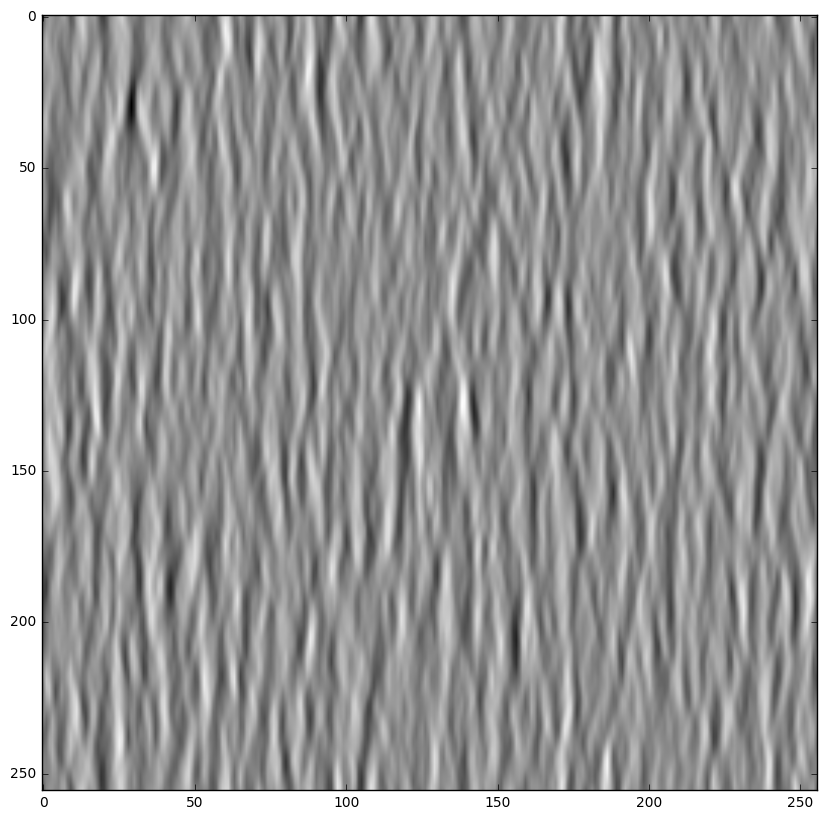

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.imshow(z.T, cmap=plt.gray())

## a simple application: defining a set of stimuli with different orientation bandwidths


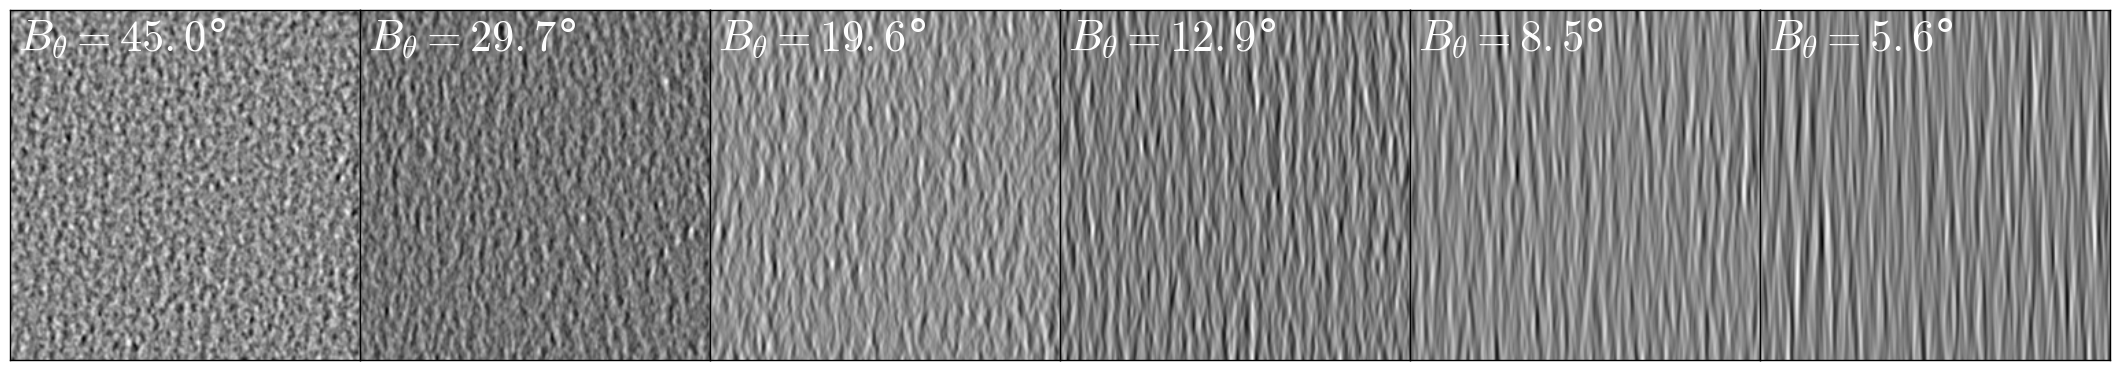

In [5]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)


N_theta = 6
bw_values = np.pi*np.logspace(-2, -5, N_theta, base=2)
fig_width = 21


fig, axs = plt.subplots(1, N_theta, figsize=(fig_width, fig_width/N_theta))
for i_ax, B_theta in enumerate(bw_values):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=np.pi/2, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

#import os
#fig.savefig(os.path.join('../figs', 'orientation_tuning.png'))